In [1]:
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## 1.Downloading data 

In [2]:
regions = ['UK','England','Wales','Scotland']
types = ['Tmin','Tmean','Tmax','Sunshine','Rainfall']

In [3]:
for r in regions:
    for t in types:
        res = requests.get('https://www.metoffice.gov.uk/pub/data/weather/uk/climate/datasets/'+t+'/date/'+r+'.txt')

        text_file = open(r+"_"+t+".txt", "w")
        text_file.write(res.text)

## 2. Parse, fill missing values and write to csv

In [10]:
for r in regions:
    for t in types:
        df = pd.read_csv(r+"_"+t+".txt",delim_whitespace=True,skiprows=7,na_values=['---'])
        #print(r,t,df.shape)
        if t == 'Sunshine':
            inx = 88
        else: inx = 107
        df['SPR'][inx] = df['DEC'][inx]
        df['SUM'][inx] = df['WIN'][inx]
        df['WIN'][inx] = df['NOV'][inx]
        df['NOV'][inx] = np.nan
        df['DEC'][inx] = np.nan
        #df.iloc[107]
        print(r,t,df.shape)
        for cols in df.columns:
            if df[cols].isnull().any():
                df[cols].fillna(round(df[cols].mean(),2),inplace=True)
        df.to_csv(r+"_"+t+".csv",index=False)

UK Tmin (108, 18)
UK Tmean (108, 18)
UK Tmax (108, 18)
UK Sunshine (89, 18)
UK Rainfall (108, 18)
England Tmin (108, 18)
England Tmean (108, 18)
England Tmax (108, 18)
England Sunshine (89, 18)
England Rainfall (108, 18)
Wales Tmin (108, 18)
Wales Tmean (108, 18)
Wales Tmax (108, 18)
Wales Sunshine (89, 18)
Wales Rainfall (108, 18)
Scotland Tmin (108, 18)
Scotland Tmean (108, 18)
Scotland Tmax (108, 18)
Scotland Sunshine (89, 18)
Scotland Rainfall (108, 18)


## 3.Exploration

In [ ]:
# Helper Function that loads data for a particulat country, converts it to time series

In [93]:
def load_data(country):
    df_uk_tmean = pd.read_csv(country+'_Tmean.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC']]

    df_uk_tmin = pd.read_csv(country+'_Tmin.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
           'NOV', 'DEC']]
    df_uk_tmax = pd.read_csv(country+'_Tmax.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
           'NOV', 'DEC']]
    df_uk_rainfiall = pd.read_csv(country+'_Rainfall.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
           'NOV', 'DEC']]
    df_uk_sun = pd.read_csv(country+'_Sunshine.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
           'NOV', 'DEC']] 
    time_uk = pd.DataFrame()
    time_uk['Time'] = pd.date_range('1910-01-01', end='2017-12-31', freq='M')
    time_uk['Tmean'] = df_uk_tmean.values.flatten()
    time_uk['Tmin'] = df_uk_tmin.values.flatten()
    time_uk['Tmax'] = df_uk_tmax.values.flatten()

    time_uk['Rainfall'] = df_uk_rainfiall.values.flatten()
    time_uk_sun = pd.DataFrame()
    time_uk_sun['Time'] = pd.date_range('1929-01-01', end='2017-12-31', freq='M')
    time_uk_sun['Sunshine'] = df_uk_sun.values.flatten()
    time_uk.set_index('Time',inplace=True)
    time_uk_sun.set_index('Time',inplace=True)
    return time_uk,time_uk_sun

In [ ]:
# Helper Function that decomposes the TimeSeries to trend,seasonality,residual and plots it.

In [74]:
def timeSeries(df_time,label):
    decompose = seasonal_decompose(df_time[label])
    trend = decompose.trend
    seasonal = decompose.seasonal
    residual = decompose.resid
    observed = decompose.observed

    fig3=plt.figure(figsize=(12,8))

    ax12=fig3.add_subplot(224)
    plt.xticks(rotation=45)
    ax12.set_xlabel('Original Data', fontsize=5)
    ax12.set_ylabel(label, fontsize=5)
    ax12.set_title('Original Data for '+ label, fontsize=10)
    ax12.plot(observed)

    ax9=fig3.add_subplot(221)
    plt.xticks(rotation=45)
    ax9.set_xlabel('Trend', fontsize=5)
    ax9.set_ylabel(label, fontsize=5)
    ax9.set_title('Trend for '+ label, fontsize=10)
    ax9.plot(trend)

    ax10=fig3.add_subplot(222)
    plt.xticks(rotation=45)
    ax10.set_xlabel('Seasonality', fontsize=5)
    ax10.set_ylabel(label, fontsize=5)
    ax10.set_title('Seasonalilty for '+ label, fontsize=10)
    ax10.plot(seasonal)

    ax11=fig3.add_subplot(223)
    plt.xticks(rotation=45)
    ax11.set_xlabel('Residual', fontsize=5)
    ax11.set_ylabel(label, fontsize=5)
    ax11.set_title('Residual for '+ label, fontsize=10)
    ax11.plot(residual)

#### 1. Country England

In [ ]:
# Selecting England for Exploration. Same can be done for other countries as well.

In [94]:
df_time,df_sun = load_data('England')

In [ ]:
# original data line plot.

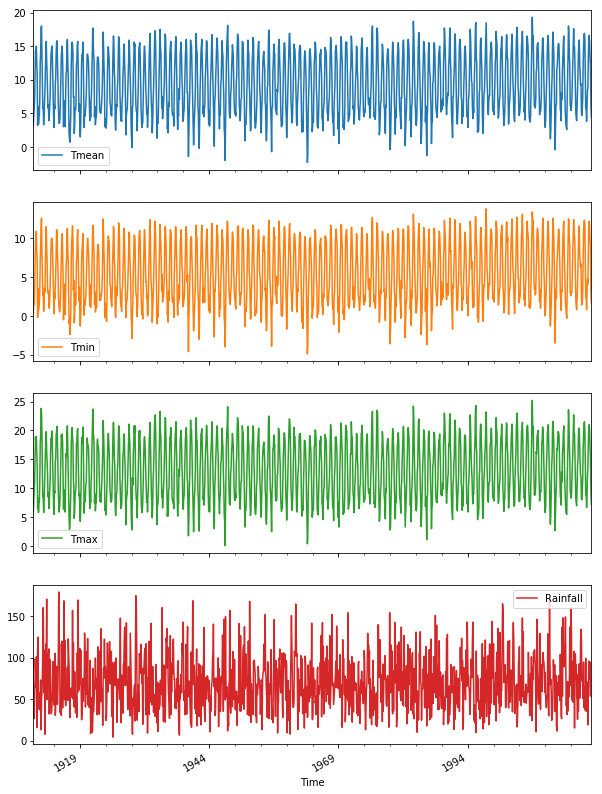

In [95]:
df_time.plot(subplots=True,figsize=(10,15))
plt.show()

#### Observation from above plot: Looks Stationary

In [ ]:
# Now we plot TimeSeries of Rainfall,Temperature and Sunshine Respectively to fine out if there exists any trend or seasonality.

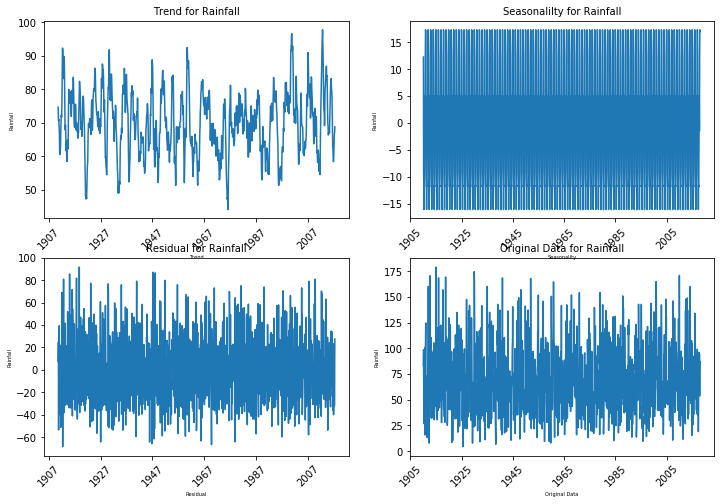

In [96]:
timeSeries(df_time,'Rainfall')

#### Observation : Rainfall looks Stationary, no trend or seasonality

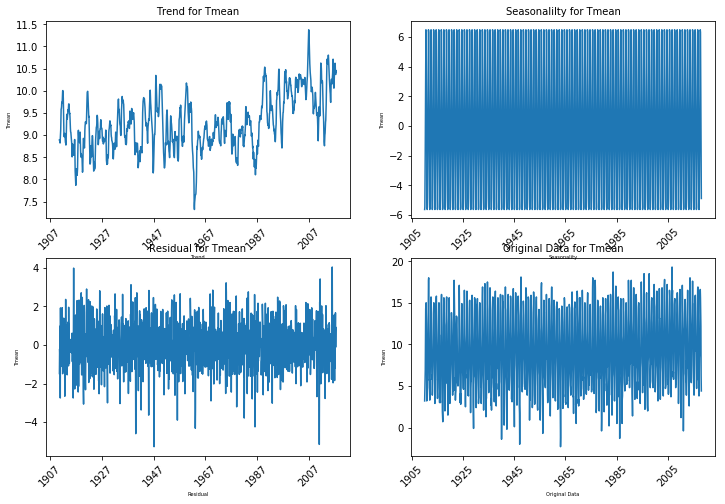

In [97]:
timeSeries(df_time,'Tmean')

#### Observation : Looks like a bit of upward trend in temperature over the period of time. We will verify it further using Dickey-Fuller Test

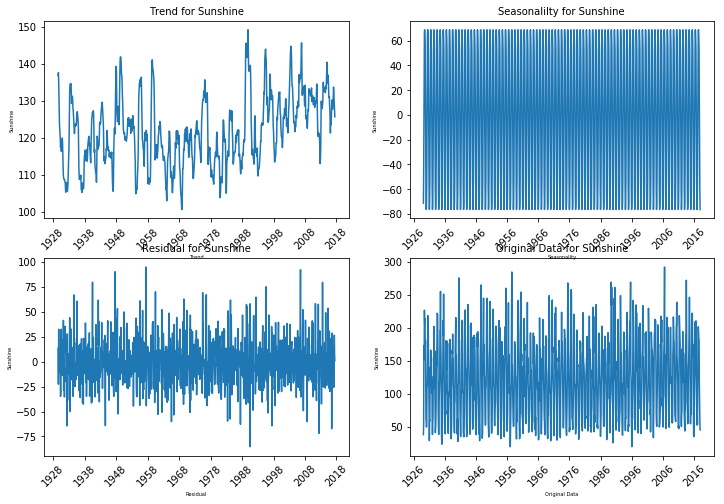

In [98]:
timeSeries(df_sun,'Sunshine')

#### overall temperature and sunshine seems to be increasing over the years.

### Correlation Matrix

In [163]:
df_corr = df_time['1929':]

In [164]:
df_corr['Sunshine'] = df_sun.values

In [167]:
df_corr.columns

Index(['Tmean', 'Tmin', 'Tmax', 'Rainfall', 'month', 'Sunshine'], dtype='object')

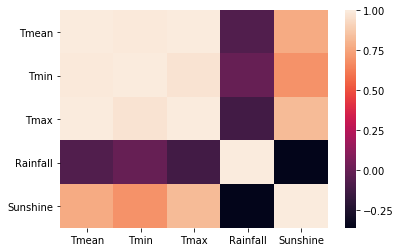

In [168]:
import seaborn as sns
corr = df_corr[['Tmean', 'Tmin', 'Tmax', 'Rainfall', 'Sunshine']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [101]:
df_sun['Sunshine'].corr(df_time['1929':]['Tmean'])

0.7755464266324128

#### Observation: High Positive Correlation between Hours of Sunshine and Temperature and Negative Correlation between Sunshine and Rainfall.

### BoxPlot

In [169]:
df_box_tmean = pd.read_csv('England_Tmean.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC']] 

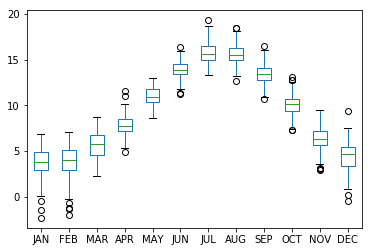

In [170]:
df_box_tmean.plot(kind='box')

#### Observation : Temperature increases from the month of April. Highest aggregate mean temperature is during July.

In [171]:
df_box_rain = pd.read_csv('England_Rainfall.csv')[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC']] 

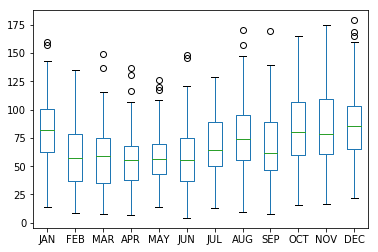

In [172]:
df_box_rain.plot(kind='box')

#### The above plot shows that rainfall is even distributed over all the months.

In [109]:
df_time['month'] = df_time.index.month

In [121]:
df_time.groupby('month').mean().transpose()

month,1,2,3,4,5,6,7,8,9,10,11,12
Tmean,3.652778,3.840741,5.616667,7.830556,10.999074,13.876852,15.775000,15.599074,13.402778,10.102778,6.328056,4.398148
Tmin,0.912037,0.860185,1.947222,3.588889,6.381481,9.189815,11.214815,11.112037,9.214815,6.499074,3.305648,1.669167
Tmax,6.393519,6.821296,9.294444,12.076852,15.628704,18.561111,20.341667,20.096296,17.603704,13.700000,9.359815,7.151389
Rainfall,82.202778,61.130556,58.298148,53.965741,58.389815,58.186111,67.529630,74.948148,68.698148,82.284259,87.247685,86.956111


#### Helper Function to find Stationarity of a TimeSeries data using Dickey-Fuller Test. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

In [124]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

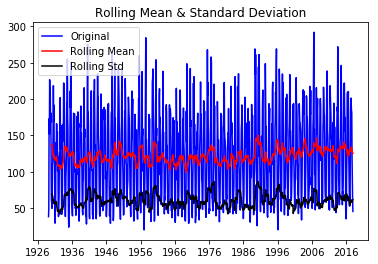

Results of Dickey-Fuller Test:
Test Statistic                   -5.637802
p-value                           0.000001
#Lags Used                       22.000000
Number of Observations Used    1045.000000
Critical Value (10%)             -2.568245
Critical Value (1%)              -3.436623
Critical Value (5%)              -2.864310
dtype: float64


In [132]:
test_stationarity(df_sun['Sunshine'])

#### Observation : Test Statistic is less than critical values which proves Sunshine data is stationary

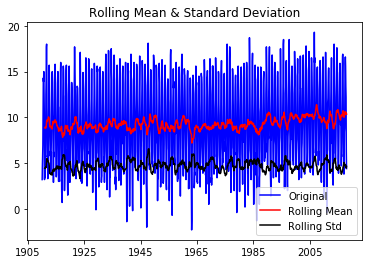

Results of Dickey-Fuller Test:
Test Statistic                   -4.147897
p-value                           0.000806
#Lags Used                       23.000000
Number of Observations Used    1272.000000
Critical Value (10%)             -2.567981
Critical Value (1%)              -3.435501
Critical Value (5%)              -2.863815
dtype: float64


In [175]:
test_stationarity(df_time['Tmean'])

#### Observation : Test Statistic is less than critical values which proves Temperature data is stationary

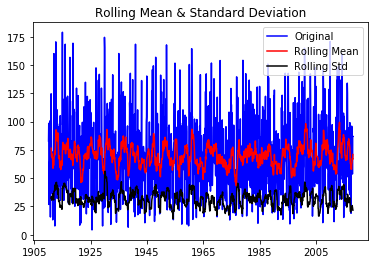

Results of Dickey-Fuller Test:
Test Statistic                -8.118112e+00
p-value                        1.175912e-12
#Lags Used                     2.100000e+01
Number of Observations Used    1.274000e+03
Critical Value (10%)          -2.567979e+00
Critical Value (1%)           -3.435493e+00
Critical Value (5%)           -2.863811e+00
dtype: float64


In [134]:
test_stationarity(df_time['Rainfall'])

#### Observation : Test Statistic is less than critical values which proves Rainfall data is stationary

### kalman Filter
I was not fully satisfied with the result of temperature being stationary.. So i applied Kalman Filter to smoothen the curve and find the trend.


In [136]:
from pykalman import KalmanFilter

ss = df_time['Tmean'].values

kf = KalmanFilter(em_vars='all')
kf = kf.em(ss)

(smoothed_state_means, smoothed_state_covariances) = kf.smooth(ss)

In [143]:
smoothed_state_means

array([[  3.34641996],
       [  4.76655395],
       [  5.85991917],
       ..., 
       [ 11.80356475],
       [  6.68598918],
       [  4.79240928]])

In [150]:
kalman = df_time.copy()

In [151]:
kalman['kalman_tmean'] = smoothed_state_means
kalman

,Tmean,Tmin,Tmax,Rainfall,month,kalman_tmean
Time,,,,,,
1910-01-31,3.20,0.30,6.00,82.90,1,3.346420
1910-02-28,4.60,1.50,7.60,98.50,2,4.766554
1910-03-31,5.70,1.50,9.80,26.80,3,5.859919
1910-04-30,6.90,2.80,11.00,63.50,4,7.159856
1910-05-31,10.80,6.10,15.40,64.20,5,10.702409
1910-06-30,14.30,9.60,18.90,64.60,6,13.847623
1910-07-31,13.90,10.00,17.90,79.80,7,13.764959
1910-08-31,15.00,10.90,19.00,100.80,8,14.533560
1910-09-30,12.40,8.20,16.50,15.70,9,12.280161


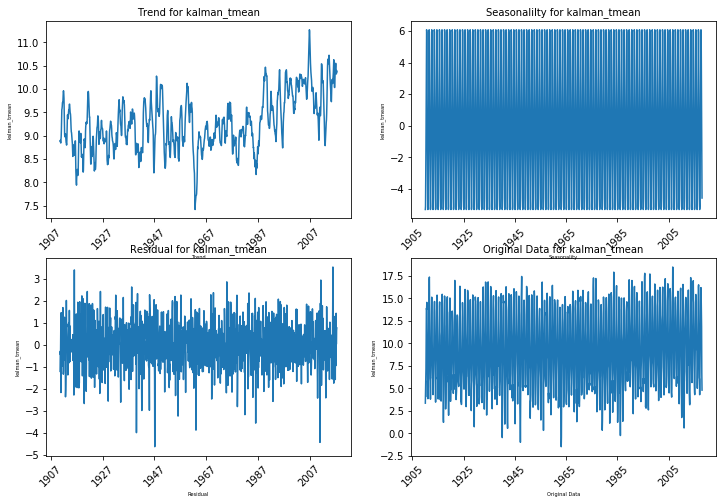

In [152]:
timeSeries(kalman,'kalman_tmean')

#### Observation : Still we get the same plot of the trend for Temperature.